# NLP第三次作业

# Part-1: 旅行家问题

In [1]:
import matplotlib.pylab as plt
import random

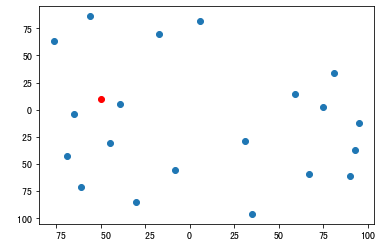

In [6]:
# 随机生成20个点
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
chosen_p = (-50, 10) # 起点
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [7]:
import pandas as pd
import numpy as np
import math
import time

In [9]:
point_list = [(x,y) for x,y in zip(latitudes,longitude)]

In [11]:
point_list.insert(0,chosen_p) # 0是插入到最开头位置

In [25]:
# point_list  # 元组

In [13]:
point_array = np.array(point_list)

In [45]:
point_array  #二维数组

array([[-50,  10],
       [ 35, -96],
       [-39,   5],
       [-56,  86],
       [  6,  82],
       [-45, -31],
       [-61, -71],
       [ 90, -61],
       [ -8, -56],
       [-17,  70],
       [ 81,  34],
       [-30, -85],
       [ 31, -29],
       [-76,  63],
       [ 67, -59],
       [-65,  -4],
       [ 93, -37],
       [ 59,  14],
       [ 75,   2],
       [-69, -43],
       [ 95, -12]])

In [31]:
dist = np.zeros((point_array.shape[0],point_array.shape[0]))

In [46]:
for i in range(point_array.shape[0]):  # 计算所有城市之间的距离
    for j in range(point_array.shape[0]):
        dist[i, j] = math.sqrt(np.sum((point_array[i, :] - point_array[j, :]) ** 2))

# 解释
- N:计数
- s:二进制表示，遍历过得城市对应位为0，未遍历为1
- dp:动态规划的距离数组
- dist：目的地间距离矩阵
- sumpath:目前的最小路径总长度
- Dtemp：当前最小距离
- path:记录下一个应该到达的城市

In [50]:
N = point_array.shape[0]  # 城市的数量

In [57]:
path = np.ones((2 ** N - 1, N), dtype = np.int)   # 开了一个超大的数组, 2^21 * 21 的数组

In [59]:
dp = np.ones((2 ** N - 1, N)) * -1

# 递推关系

T(s, init) = min{T(s-i, i) + dist[i][init]}

T(s,init)代表的意思是从init点出发经过s中全部的点回到0的距离。dist是distance的缩写

In [65]:
def TSP(s, init):  # 实现以上递推关系
    if dp[s][init] != -1: return dp[s][init] 
    
    if s == 0: return dist[0][init]  #  到达叶子节点了,最后一个城市到出发点的距离
    
    sumpath = float('inf')
    
    for i in range(N):
        if s & (1 << i): # 判断是否遍历过城市i
            m = TSP(s & (~ (1 << i)) ,i) +  dist[i][init]
            if m < sumpath: # 更新更短路径
                sumpath = m
                path[s][init] = i
    dp[s][init] = sumpath
    return dp[s][init]

In [72]:
init_point = 0
s = 0

for i in range(1,N):
    print(bin(s))
    s = s | (1<<i)

0b0
0b10
0b110
0b1110
0b11110
0b111110
0b1111110
0b11111110
0b111111110
0b1111111110
0b11111111110
0b111111111110
0b1111111111110
0b11111111111110
0b111111111111110
0b1111111111111110
0b11111111111111110
0b111111111111111110
0b1111111111111111110
0b11111111111111111110


In [73]:
start = time.time()
distance = TSP(s, init_point)
end = time.time()

In [74]:
for i in range(1, N):
    s = s|(1<<i)
init = 0
num = 0
print(distance)
route = [chosen_p]

756.1912734008238


In [76]:
while True:
    print(path[s][init])
    init = path[s][init]
    route.append(point_list[init])
    s = s & (~ (1 << init))
    num += 1
    if num > N-2: break

print("程序的运行时间是：%s" %(end-start))

13
3
9
4
10
17
18
20
16
7
14
1
12
8
11
6
19
5
15
2
程序的运行时间是：540.9201259613037


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


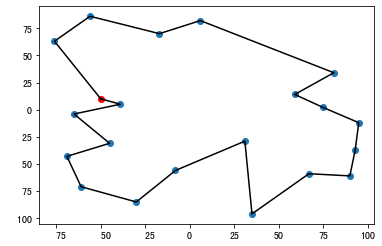

In [77]:
route.append(chosen_p)
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point[0] for point in route]
y = [point[1] for point in route]
plt.plot(x, y, color='black')

# Part 2 ：梯度下降
change loss function from $loss = \frac{1}{n}\sum{(y_i - (\hat y_i))^2}$  to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code

In [1]:
from sklearn.datasets import load_boston  # 波士顿房价的数据集

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']   # X是输入值，比如犯罪率，房子面积等等，y为输出，为房子的价格

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import random

In [6]:
def draw_rm_and_price():  # X只取出5列的数据，y是实际的房价
    plt.scatter(X[:, 5], y)

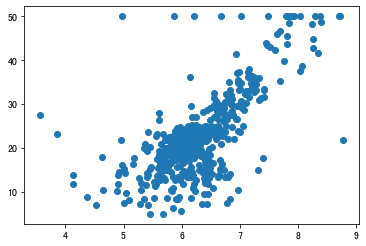

In [7]:
draw_rm_and_price()

In [9]:
def price(rm, k, b):  # 预测价格
    """f(x) = k * x + b"""
    return k * rm + b

#### $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [11]:
def loss2(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [14]:
def partial_k(x, y, y_hat):  # 如上图所示，loss对k求导数
    n = len(y)
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient -=  x_i
        else: 
            gradient +=  x_i
    
    return gradient / n


def partial_b(x, y, y_hat): # 如上图所示，loss对b求导数
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient -= 1
        else: 
            gradient +=  1
    return gradient / n

In [17]:
best_k, best_b = None, None
X_rm = X[:, 5]

In [22]:
trying_times = 2000  

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100   # 初始化是一个研究的点，损失函数如何定义也是一个研究的点
current_b = random.random() * 200 - 100

learning_rate = 1e-02  #学习率是需要调参的

update_time = 0
for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]   # 由当前的k和b得到的预测值
    current_loss = loss(y, price_by_k_and_b)     # 当前预测值与实际值的误差
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    
    # 梯度下降
    k_gradient = partial_k(X_rm, y, price_by_k_and_b) # 对k求导的值
    b_gradient = partial_b(X_rm, y, price_by_k_and_b) # 对b求导的值
    # 更新下一轮的k,b值了
    current_k = current_k + (-1 * k_gradient) * learning_rate  
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -51.88431586795055 best_b: -70.05742678256428, and the loss is: 177155.80651784452
When time is : 50, get best_k: -48.74199867427471 best_b: -69.55742678256402, and the loss is: 160427.33829422333
When time is : 100, get best_k: -45.599681480598875 best_b: -69.05742678256377, and the loss is: 144528.58846645596
When time is : 150, get best_k: -42.45736428692304 best_b: -68.55742678256351, and the loss is: 129459.5570345431
When time is : 200, get best_k: -39.3150470932472 best_b: -68.05742678256325, and the loss is: 115220.24399848442
When time is : 250, get best_k: -36.172729899571365 best_b: -67.557426782563, and the loss is: 101810.64935828025
When time is : 300, get best_k: -33.03041270589553 best_b: -67.05742678256274, and the loss is: 89230.77311393025
When time is : 350, get best_k: -29.888095512219692 best_b: -66.55742678256249, and the loss is: 77480.61526543433
When time is : 400, get best_k: -26.745778318543856 best_b: -66.05742678256223, and th

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


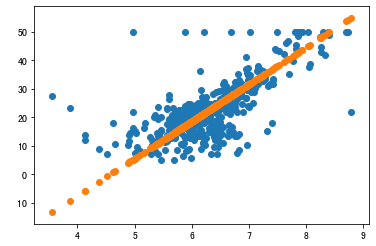

In [23]:
price_by_best_k_and_b = [price(r, best_k, best_b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_best_k_and_b)

# Part 3: Finish the Solution Parse Part of Edit-Distance

In [26]:
import functools

In [42]:
solution = {}  # 记录插入删除替换的过程

In [43]:
@functools.lru_cache(maxsize=2**10)  # 用来做缓存，他能把相对耗时的函数结果进行保存，避免传入相同的参数重复计算
def edit_distance(string1, string2):  # 递归函数,返回的int表示距离
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [  # 记录一步操作是删除还是插入
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:  # 最后一个字符相同
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')  # 直接去掉最后一个字符,距离不增加
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))  # 最后一个字符替换成相同的
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [49]:
edit_distance('ABCDE', 'ABCCEF')

2

In [50]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [51]:
solution.keys()

dict_keys([('A', 'A'), ('A', 'AB'), ('A', 'ABC'), ('A', 'ABCC'), ('A', 'ABCCE'), ('A', 'ABCCEF'), ('AB', 'A'), ('AB', 'AB'), ('AB', 'ABC'), ('AB', 'ABCC'), ('AB', 'ABCCE'), ('AB', 'ABCCEF'), ('ABC', 'A'), ('ABC', 'AB'), ('ABC', 'ABC'), ('ABC', 'ABCC'), ('ABC', 'ABCCE'), ('ABC', 'ABCCEF'), ('ABCD', 'A'), ('ABCD', 'AB'), ('ABCD', 'ABC'), ('ABCD', 'ABCC'), ('ABCD', 'ABCCE'), ('ABCD', 'ABCCEF'), ('ABCDE', 'A'), ('ABCDE', 'AB'), ('ABCDE', 'ABC'), ('ABCDE', 'ABCC'), ('ABCDE', 'ABCCE'), ('ABCDE', 'ABCCEF')])

In [57]:
parse={}

def parse_solution():
    keys = list(solution.keys())
    i = -1
    while i>= -len(solution):
        #print(1)
        if 'SUB' in solution[keys[i]].split(' ') or not solution[keys[i]]:
            
            parse[keys[i]]=solution[keys[i]]
            (string1,string2)=(keys[i][0][:-1], keys[i][1][:-1])
            if not string1 or not string2:
                break
            index = keys.index((string1,string2))  
            i=index-len(solution)
        else:
            parse[keys[i]]=solution[keys[i]]
            i=i-1

In [58]:
parse_solution()

In [59]:
parse

{('ABCDE', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'ABCCE'): '',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABC', 'ABC'): '',
 ('AB', 'AB'): '',
 ('A', 'A'): ''}